In [1]:
import pandas as pd
import mysql.connector

In [3]:
conn = mysql.connector.connect(
    host="localhost",
    user="root",
    password="Prakriti@2405",
    database="bi_platform"
)

In [11]:
query = """
SELECT 
    s.*,
    c.Segment,
    c.Location
FROM sales s
JOIN customer c
    ON s.`Customer ID` = c.`Customer ID`
"""

In [12]:
df = pd.read_sql(query, conn)

C:\Users\DELL\AppData\Local\Temp\ipykernel_5248\1168034203.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


In [13]:
print(df.head())

    Order ID  Order Date Product Category   Region  Quantity Customer ID  \
0  ORD200000  22-09-2024  Office Supplies  Central         5  CUST101736   
1  ORD200001  13-08-2025      Accessories    South         9  CUST101336   
2  ORD200003  10-03-2022        Furniture     West         9  CUST104155   
3  ORD200004  03-11-2025      Electronics  Central         1  CUST103818   
4  ORD200005  15-11-2025      Accessories  Central         4  CUST100695   

   Revenue   Profit    Segment Location  
0    13525  3133.52        SME    Delhi  
1    29214  7500.14  Corporate  Kolkata  
2    15336  1545.88        SME  Chennai  
3     3137   409.53  Corporate     Pune  
4    19584  2183.28  Corporate     Pune  


#### 2. Data Understanding

In [14]:
df.shape

(20000, 10)

In [16]:
df.columns

Index(['Order ID', 'Order Date', 'Product Category', 'Region', 'Quantity',
       'Customer ID', 'Revenue', 'Profit', 'Segment', 'Location'],
      dtype='object')

In [17]:
df.info

<bound method DataFrame.info of         Order ID  Order Date Product Category   Region  Quantity Customer ID  \
0      ORD200000  22-09-2024  Office Supplies  Central         5  CUST101736   
1      ORD200001  13-08-2025      Accessories    South         9  CUST101336   
2      ORD200003  10-03-2022        Furniture     West         9  CUST104155   
3      ORD200004  03-11-2025      Electronics  Central         1  CUST103818   
4      ORD200005  15-11-2025      Accessories  Central         4  CUST100695   
...          ...         ...              ...      ...       ...         ...   
19995  ORD219976  08-11-2022  Office Supplies  Central         7  CUST104984   
19996  ORD219977  01-10-2024      Accessories     East         2  CUST104785   
19997  ORD219989  16-06-2023  Office Supplies     East         7  CUST104784   
19998  ORD219996  02-04-2023  Office Supplies  Central         2  CUST104760   
19999  ORD219997  23-06-2023      Accessories    South         3  CUST104978   

       

#### 3.Data Cleaning And Preprocessing

In [18]:
# Missing values
df.isnull().sum()

Order ID            0
Order Date          0
Product Category    0
Region              0
Quantity            0
Customer ID         0
Revenue             0
Profit              0
Segment             0
Location            0
dtype: int64

In [19]:
# Convert Order Date to datetime
df['Order Date'] = pd.to_datetime(df['Order Date'], errors='coerce')

C:\Users\DELL\AppData\Local\Temp\ipykernel_5248\4012282857.py:2: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Order Date'] = pd.to_datetime(df['Order Date'], errors='coerce')


#### Exploratory Data Analysis (EDA)

In [20]:
df.describe()

,Order Date,Quantity,Revenue,Profit
count,20000,20000.000000,20000.000000,20000.000000
mean,2023-12-27 14:51:43.199999744,5.007700,13799.211850,2415.632253
min,2022-01-01 00:00:00,1.000000,507.000000,27.210000
25%,2022-12-26 18:00:00,3.000000,5229.000000,804.725000
50%,2023-12-21 00:00:00,5.000000,11139.000000,1714.290000
75%,2024-12-28 00:00:00,7.000000,20106.000000,3374.270000
max,2025-12-31 00:00:00,9.000000,44973.000000,13156.710000
std,NaN,2.581371,10236.749841,2179.328259


#### Trend Analysis (Monthly Revenue)

In [21]:
monthly_sales = (
    df.groupby(df['Order Date'].dt.to_period('M'))['Revenue']
    .sum()
)

monthly_sales

Order Date
2022-01    6011530
2022-02    5281872
2022-03    6711051
2022-04    5699071
2022-05    5728200
2022-06    6111450
2022-07    5612401
2022-08    6121212
2022-09    4849848
2022-10    5486687
2022-11    5661121
2022-12    6512454
2023-01    6066425
2023-02    4708919
2023-03    5334215
2023-04    6082759
2023-05    5979947
2023-06    5983594
2023-07    6263784
2023-08    5585212
2023-09    5993200
2023-10    6334277
2023-11    5387259
2023-12    5826629
2024-01    5589091
2024-02    5281524
2024-03    5582107
2024-04    5263557
2024-05    5765953
2024-06    5880833
2024-07    6433363
2024-08    5531293
2024-09    6198408
2024-10    5828045
2024-11    5450974
2024-12    6225413
2025-01    5644150
2025-02    5363511
2025-03    5876988
2025-04    5571068
2025-05    5820268
2025-06    5348128
2025-07    5743716
2025-08    5496073
2025-09    4900977
2025-10    6256287
2025-11    5607266
2025-12    5992127
Freq: M, Name: Revenue, dtype: int64

#### Data Visualization (EDA) Monthly Revenue Trend

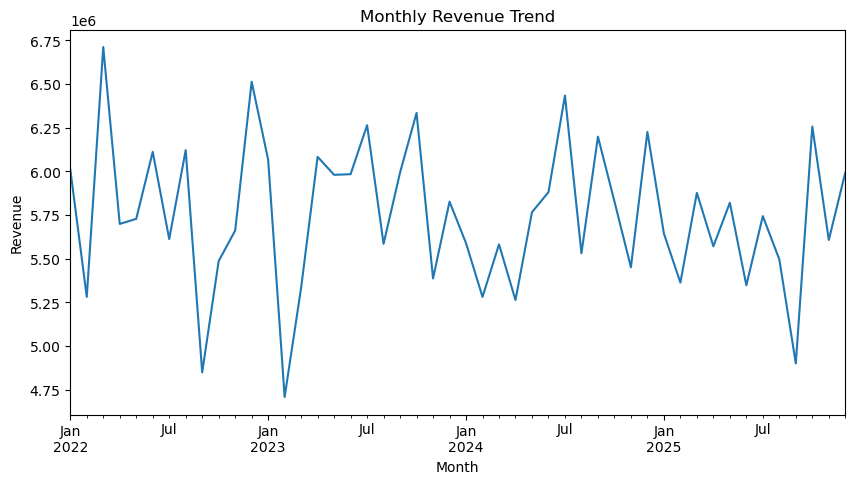

In [22]:
import matplotlib.pyplot as plt

monthly_sales.plot(kind='line', figsize=(10,5), title='Monthly Revenue Trend')
plt.xlabel('Month')
plt.ylabel('Revenue')
plt.show()

#### Region-wise Performance

In [23]:
region_performance = df.groupby('Region')['Revenue'].sum().sort_values(ascending=False)
region_performance

Region
West       56845830
South      55862380
Central    55338476
East       54166253
North      53771298
Name: Revenue, dtype: int64

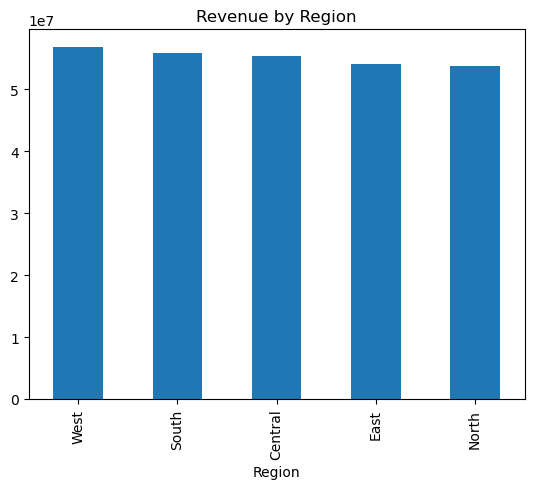

In [24]:
region_performance.plot(kind='bar', title='Revenue by Region')
plt.show()

#### Product Category Performance

In [25]:
category_performance = df.groupby('Product Category')[['Revenue', 'Profit']].sum()
category_performance

,Revenue,Profit
Product Category,,
Accessories,55040207,9674577.65
Clothing,56349076,9838587.05
Electronics,54973729,9612746.95
Furniture,55153875,9696477.77
Office Supplies,54467350,9490255.63


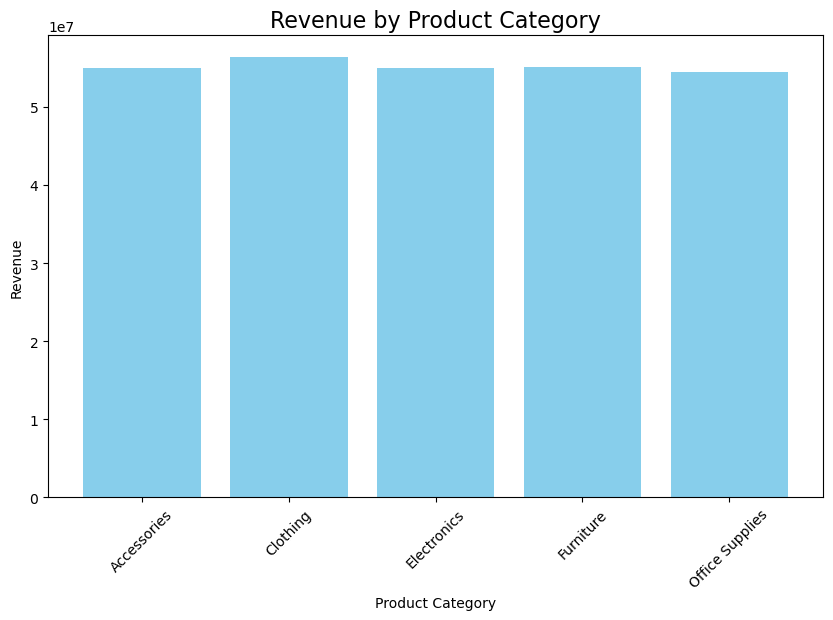

In [26]:
# Plot Revenue by Product Category
plt.figure(figsize=(10,6))
plt.bar(category_performance.index, category_performance['Revenue'], color='skyblue')
plt.title('Revenue by Product Category', fontsize=16)
plt.xlabel('Product Category')
plt.ylabel('Revenue')
plt.xticks(rotation=45)
plt.show()

#### Customer Segment Analysis

In [27]:
segment_performance = df.groupby('Segment')['Revenue'].sum()
segment_performance

Segment
Consumer     96266302
Corporate    90508964
SME          89208971
Name: Revenue, dtype: int64

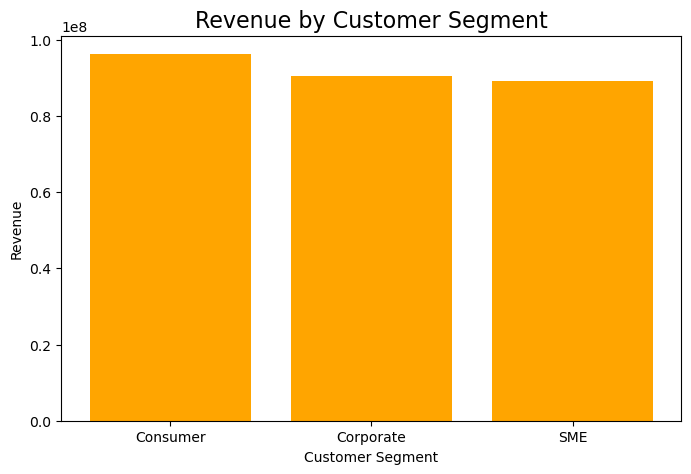

In [28]:
plt.figure(figsize=(8,5))
plt.bar(segment_performance.index, segment_performance.values, color='orange')
plt.title('Revenue by Customer Segment', fontsize=16)
plt.xlabel('Customer Segment')
plt.ylabel('Revenue')
plt.show()

#### Correlation Analysis

In [29]:
df[['Revenue', 'Profit', 'Quantity']].corr()

,Revenue,Profit,Quantity
Revenue,1.000000,0.822589,0.693598
Profit,0.822589,1.000000,0.568380
Quantity,0.693598,0.568380,1.000000


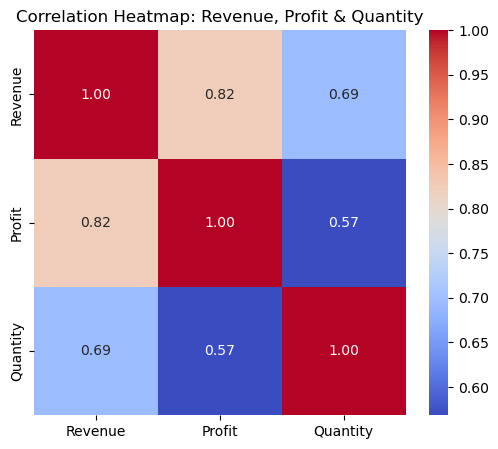

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute correlation
corr_matrix = df[['Revenue', 'Profit', 'Quantity']].corr()

# Plot heatmap
plt.figure(figsize=(6,5))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap: Revenue, Profit & Quantity')
plt.show()

#### Export Clean Data for Power BI / Excel

In [31]:
df.to_csv('cleaned_sales_data.csv', index=False)